In [2]:

import os
custom_folder = "Data"
os.makedirs(custom_folder, exist_ok=True)

dataset_name = "arshid/iris-flower-dataset"

os.system(f"kaggle datasets download -d {dataset_name} -p {custom_folder} --unzip")

print(f"Dataset successfully downloaded to: {custom_folder}")

Dataset URL: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
License(s): CC0-1.0

Dataset successfully downloaded to: Data


100%|█████████████████████████████████████| 0.99k/0.99k [00:00<00:00, 1.79MB/s]


In [3]:
%pip install pandas numpy matplotlib seaborn torch torchvision torchaudio pandas scikit-learn numpy sweetviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np


Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv("Data/Iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


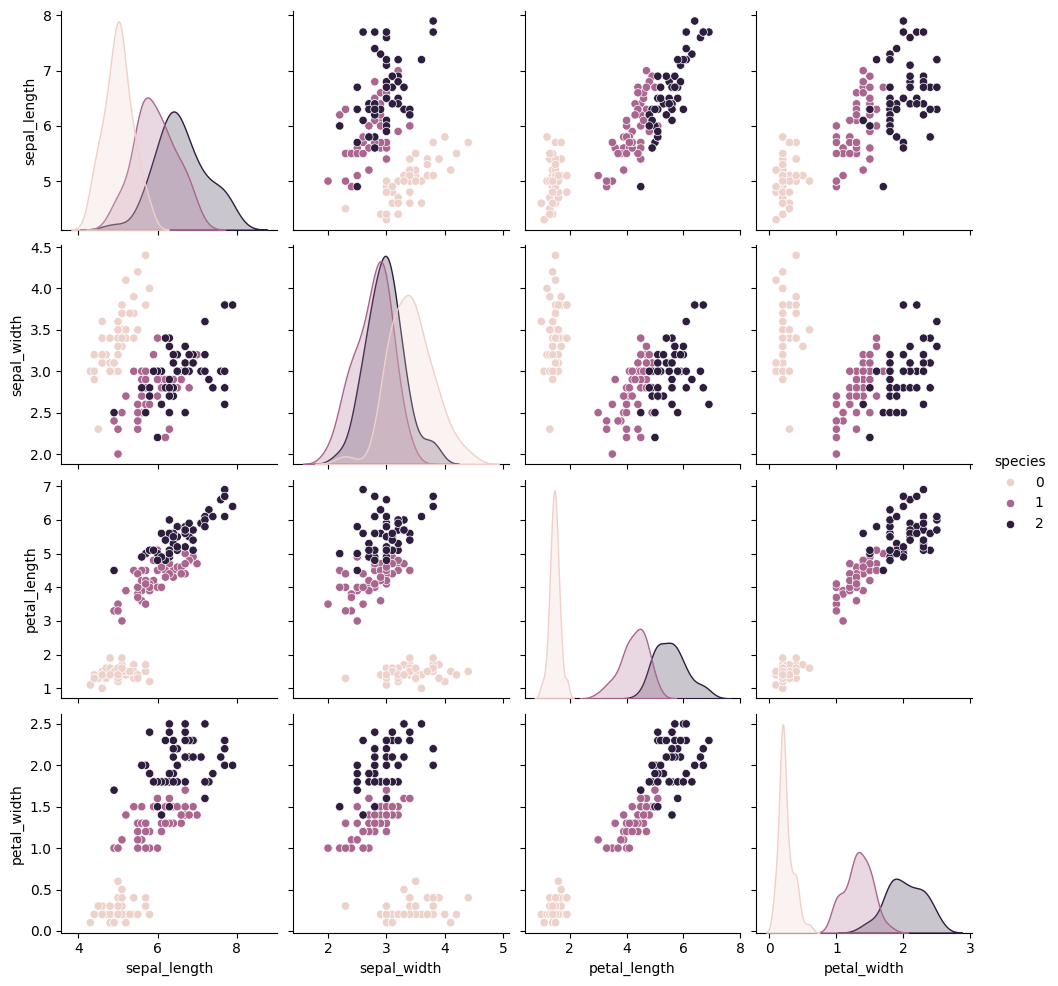

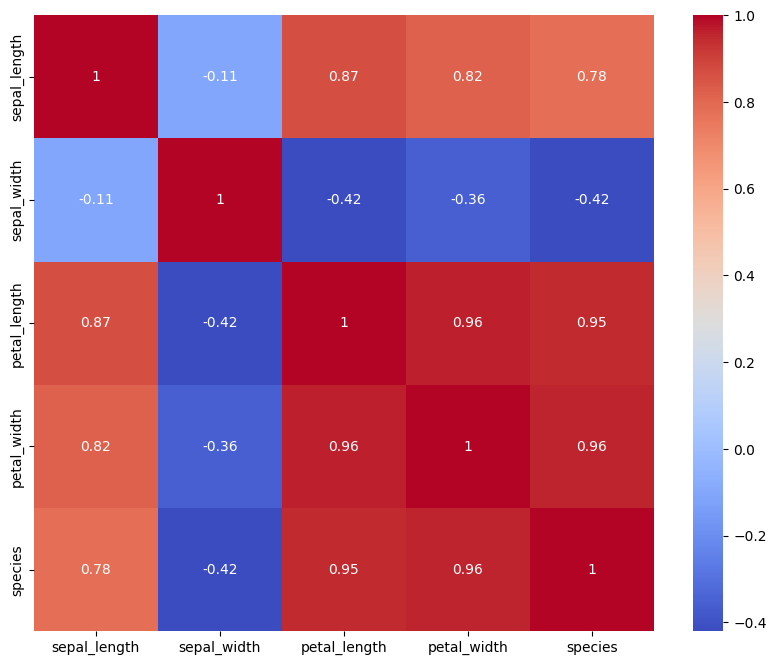

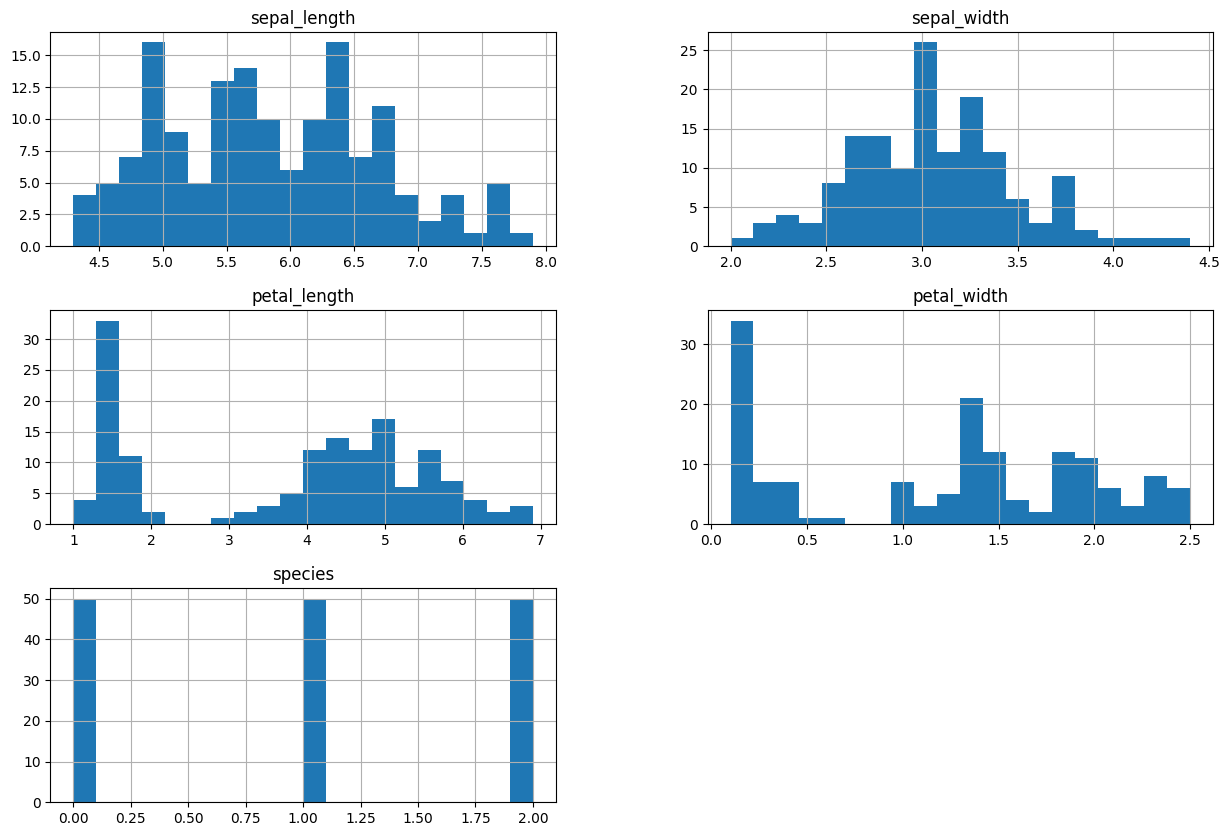

In [6]:
# Display basic statistics

label_encoder = LabelEncoder()
df["species"] = label_encoder.fit_transform(df["species"])
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Plot pairplot to visualize relationships between variables
sns.pairplot(df, hue='species')
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Plot distribution of each feature
df.hist(bins=20, figsize=(15, 10))
plt.show()

       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


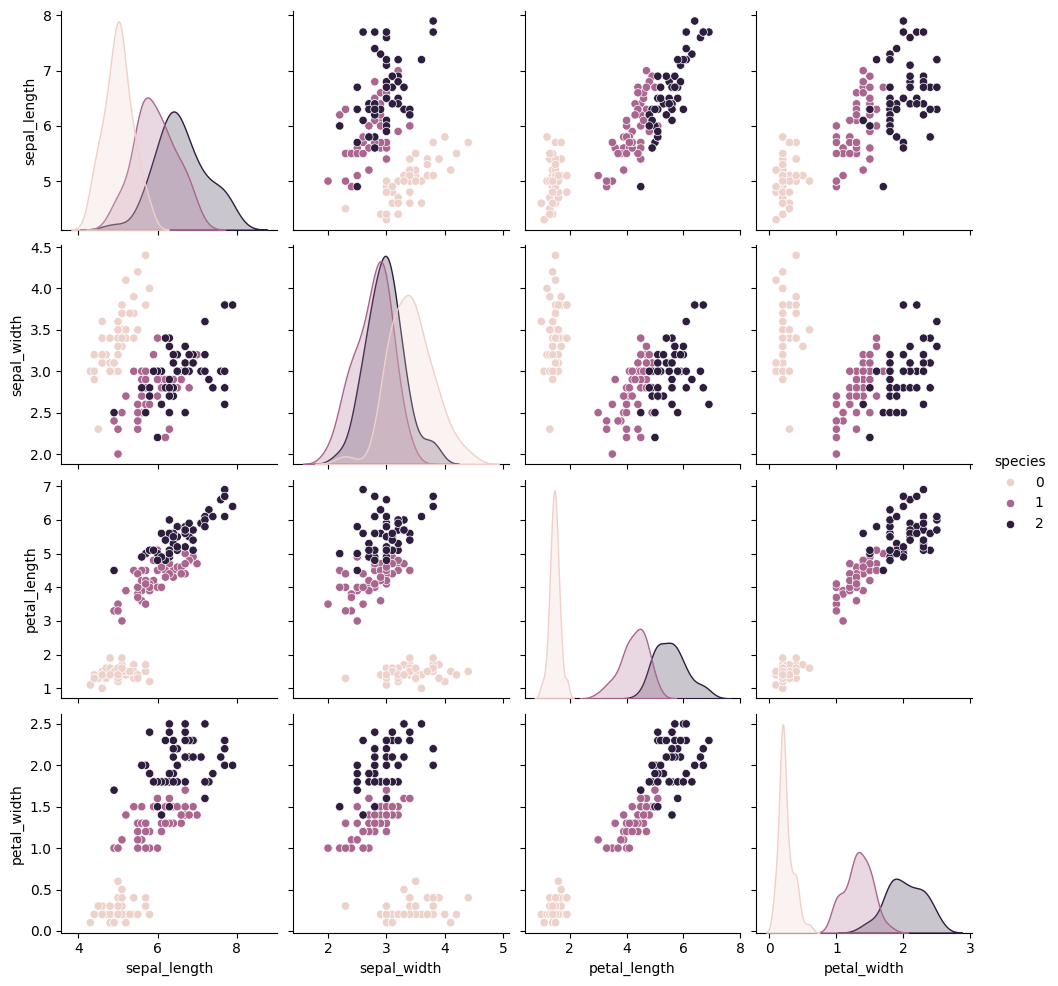

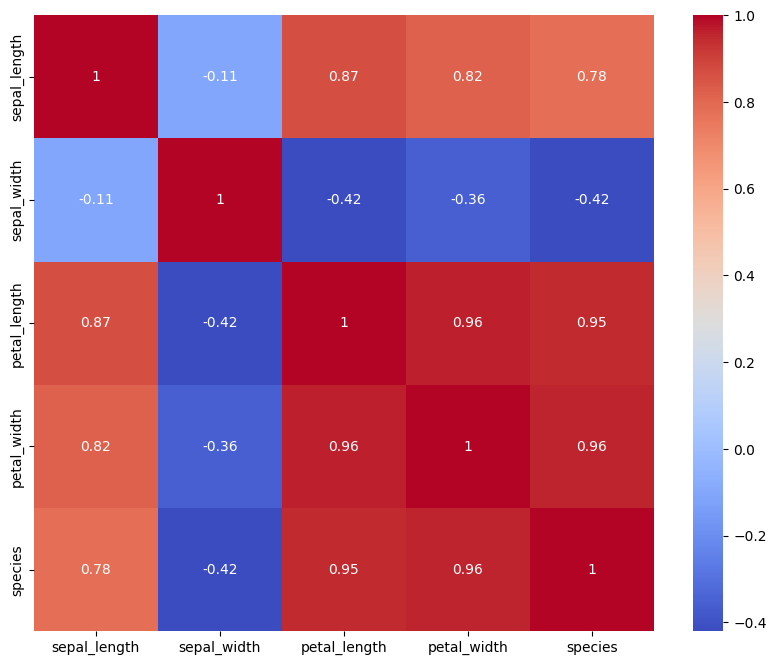

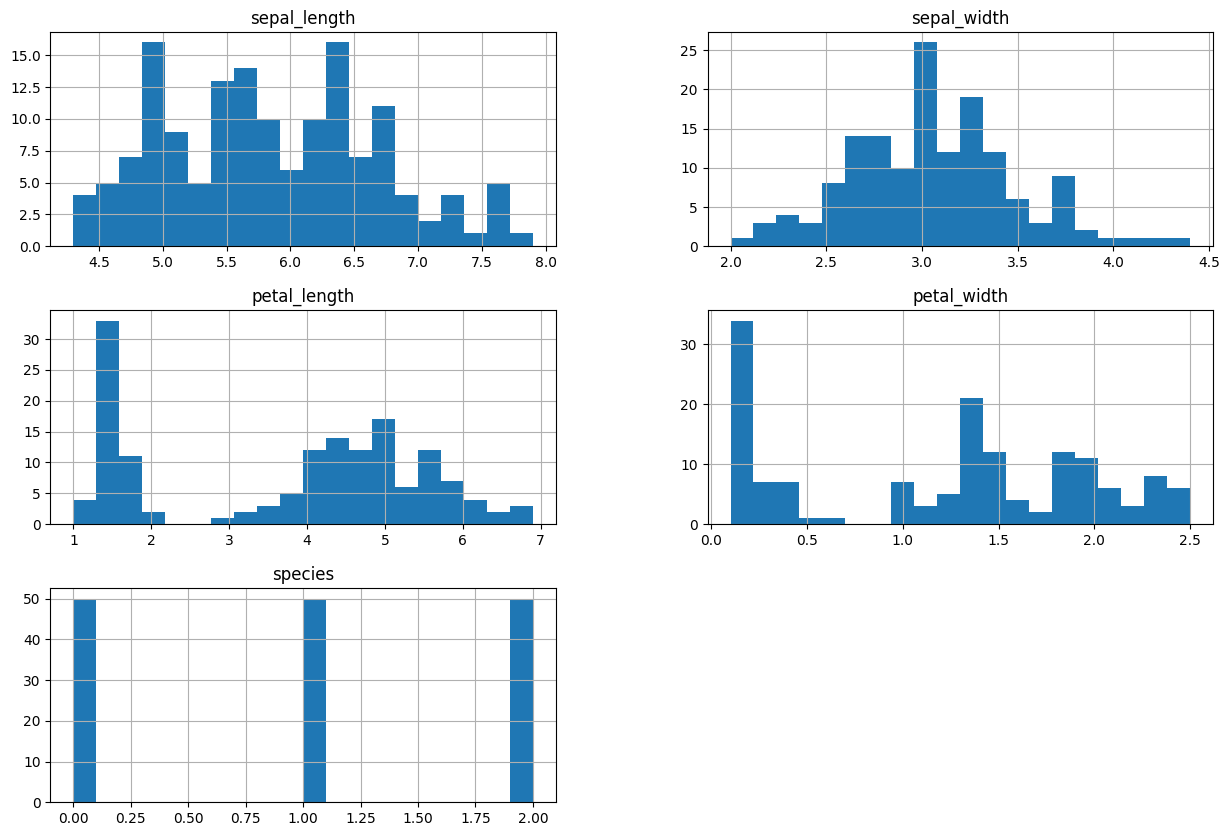

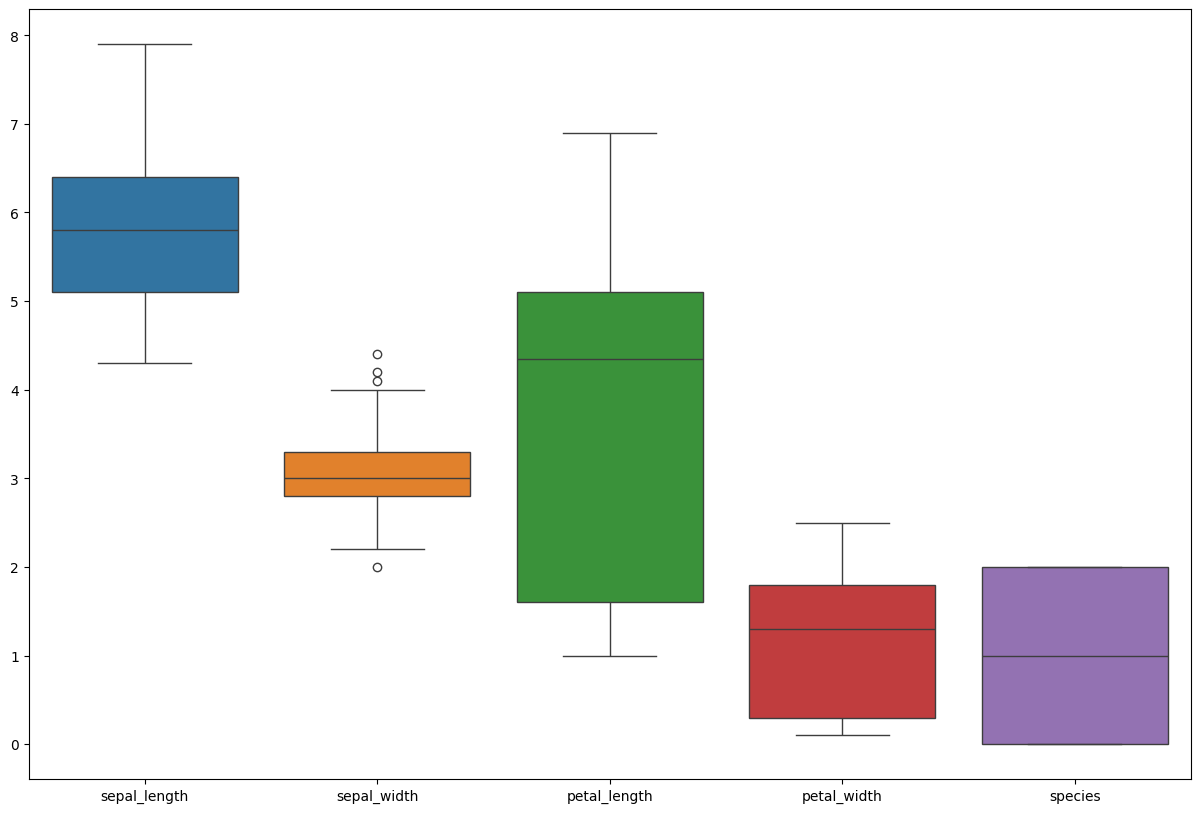

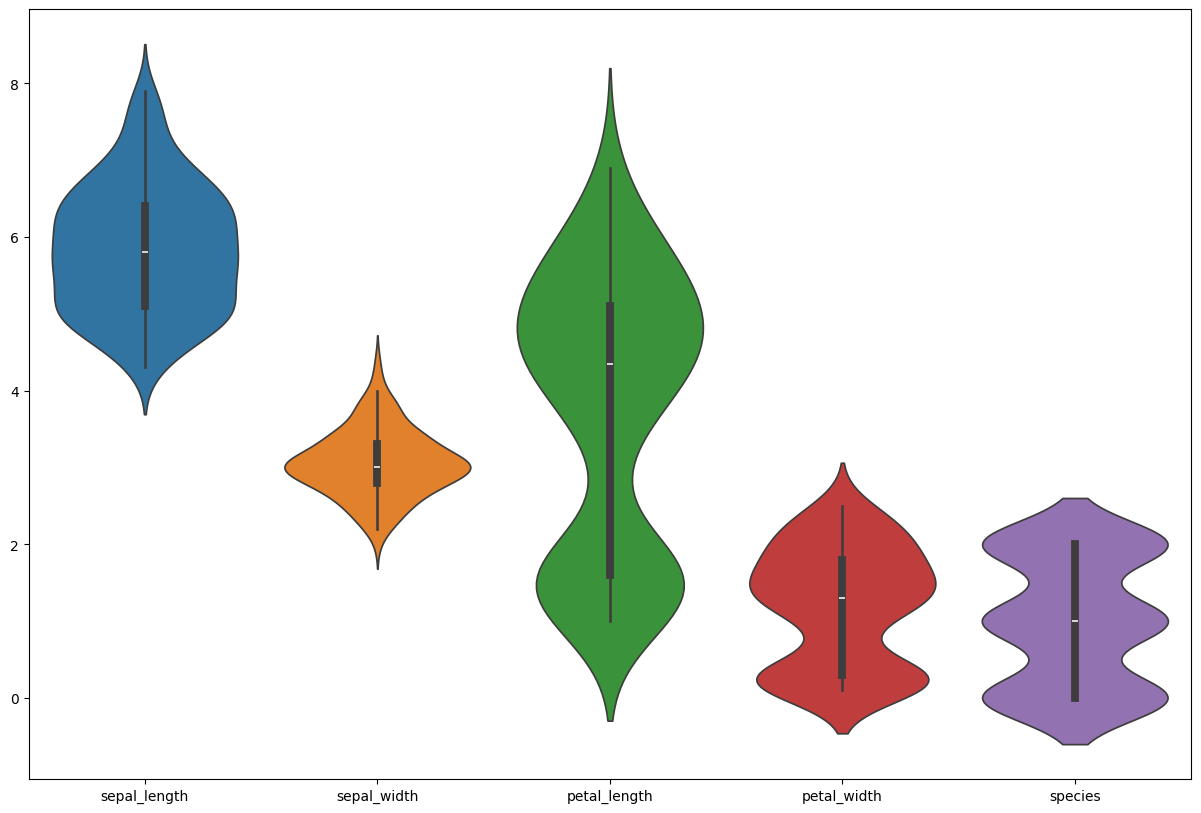

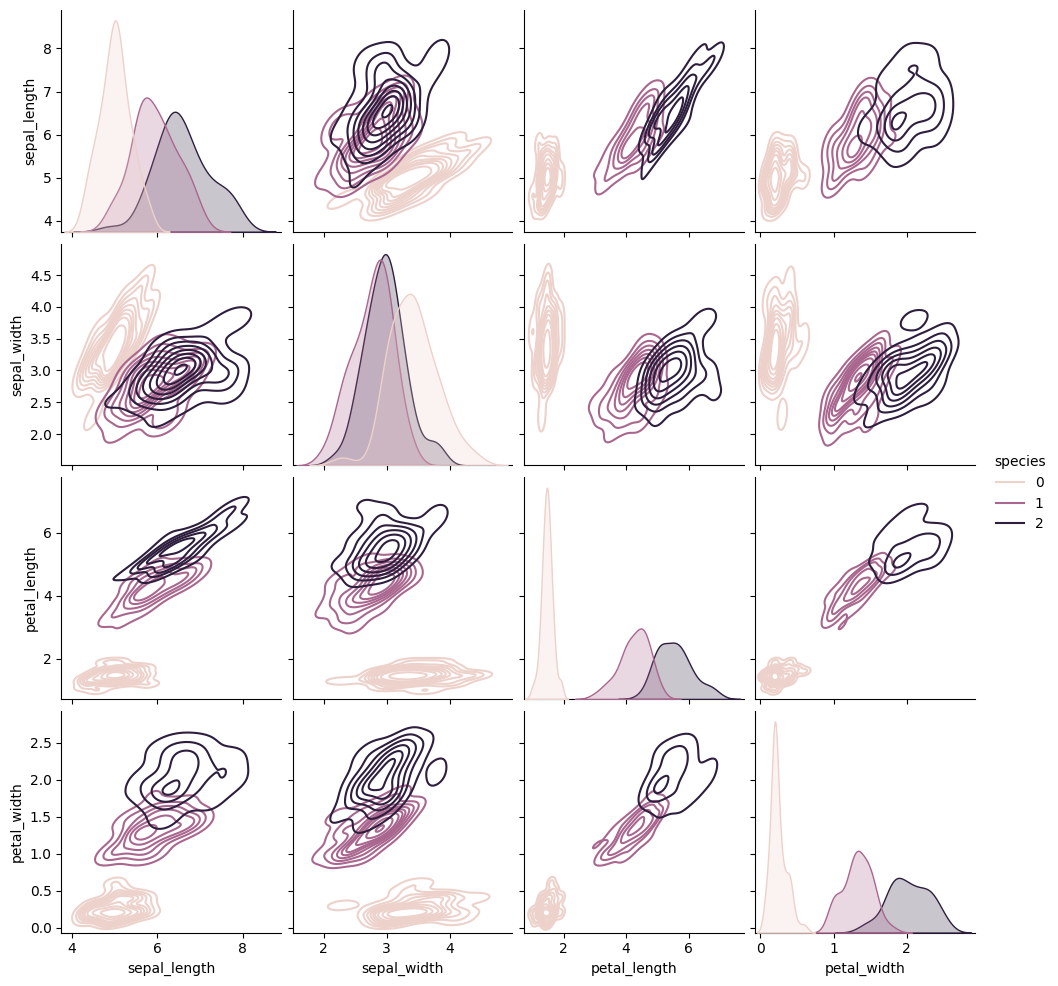

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [7]:
# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Plot pairplot to visualize relationships between variables
sns.pairplot(df, hue='species')
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Plot distribution of each feature
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Advanced visualizations
# Box plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()

# Violin plot
plt.figure(figsize=(15, 10))
sns.violinplot(data=df)
plt.show()

# Pair plot with KDE
sns.pairplot(df, hue='species', kind='kde')
plt.show()

# Encoding categorical variables
# Assuming 'species' is the only categorical variable
df['species'] = label_encoder.fit_transform(df['species'])
print(df.head())

In [9]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [12]:
# Splitting the dataset
x = df.drop('species', axis=1)
y = df['species']

In [14]:
x.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (120, 4)
Testing data shape: (30, 4)


In [18]:
# Scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)